<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Assignment 2 // Statistical Treatment for Retail Dataset</font></h1>

# Data Preparation

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

# reading csv data
feedback_elearning = pd.read_csv('dataset/ELearn_2020.csv')
feedback_elearning.head(10)

d:\installation\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BULAN,USERNAME,CFU/FU,DIVISI,NAME,SURNAME,HCBP,COURSE,TGL PRE TEST,PRE TEST,TGL POST TEST,POST TEST,STATUS,JOB FAMILY,Unnamed: 14,Unnamed: 15
0,1,120180321,CFU CONSUMER,DIV-TR7,NURFAINI ROFIFAH,-120180321,HCBP 1,9 Core Element of Marketing,2020-01-24,40,-,-,BELUM AKSES,EL - Commerce &amp; Relations,NaN,NaN
1,1,625140,CFU CONSUMER,DIV-TR2,SAMAD PANENGKE,-625140,HCBP 1,PT - 2 Project,2020-01-29,80,2020-01-31,100,LULUS,NaN,NaN,NaN
2,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-27,70,2020-01-28,93.33,LULUS,NaN,NaN,NaN
3,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-27,40,2020-01-28,100,LULUS,NaN,NaN,NaN
4,1,625143,CFU CONSUMER,DIV-TR2,DEDI SARDANI,-625143,HCBP 1,DigiERP,2020-01-28,80,2020-01-28,85,LULUS,NaN,NaN,NaN
5,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-22,90,2020-01-22,93.33,LULUS,NaN,NaN,NaN
6,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-22,80,2020-01-22,80,LULUS,NaN,NaN,NaN
7,1,625146,CFU CONSUMER,DIV-TR2,BAHRUDIN,-625146,HCBP 1,DigiERP,2020-01-22,80,2020-01-22,85,LULUS,NaN,NaN,NaN
8,1,625154,CFU CONSUMER,DIV-TR2,MUHIZAT SYEH IRIANTO,-625154,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-23,80,2020-01-28,73.33,LULUS,NaN,NaN,NaN
9,1,625154,CFU CONSUMER,DIV-TR2,MUHIZAT SYEH IRIANTO,-625154,HCBP 1,CX Transformation Program Behavior Skill Techn...,2020-01-23,90,2020-01-28,86.67,LULUS,NaN,NaN,NaN


In [2]:
feedback_elearning.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)

In [3]:
feedback_elearning['PRE TEST'].tail(10)
# .tail(30)

289047    12:23:39
289048    13:10:44
289049    12:00:29
289050    10:39:35
289051    17:43:12
289052    14:48:53
289053    13:57:57
289054    17:02:23
289055    15:12:00
289056    20:42:48
Name: PRE TEST, dtype: object

In [4]:
# cleansing feature status
feedback_elearning['STATUS'][feedback_elearning.STATUS != 'LULUS'] = feedback_elearning['STATUS'][feedback_elearning.STATUS != 'LULUS'] = 'TIDAK LULUS'
feedback_elearning['STATUS'].value_counts().head(100)

<ipython-input-4-857f48a49a02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback_elearning['STATUS'][feedback_elearning.STATUS != 'LULUS'] = feedback_elearning['STATUS'][feedback_elearning.STATUS != 'LULUS'] = 'TIDAK LULUS'


LULUS          164064
TIDAK LULUS    124993
Name: STATUS, dtype: int64

In [5]:
feedback_elearning.isna().sum()

BULAN                0
USERNAME             0
CFU/FU             138
DIVISI             139
NAME                 3
SURNAME              0
HCBP               315
COURSE               0
TGL PRE TEST      4147
PRE TEST          4147
TGL POST TEST     4147
POST TEST            0
STATUS               0
JOB FAMILY       99583
dtype: int64

In [6]:
# change all 'object' to numeric method 1
feedback_elearning['PRE TEST'] = pd.to_numeric(feedback_elearning['PRE TEST'], errors='coerce')
feedback_elearning['POST TEST'] = pd.to_numeric(feedback_elearning['POST TEST'], errors='coerce')

In [7]:
# df_data = pd.DataFrame
df_data = pd.DataFrame(feedback_elearning)
# df_data['POST TEST'] = pd.DataFrame(feedback_elearning['POST TEST'])
# df_data['STATUS'] = pd.DataFrame(feedback_elearning['STATUS'])

df_data.drop(['BULAN', 'USERNAME', 'CFU/FU', 'DIVISI', 'NAME', 'SURNAME', 'HCBP', 'COURSE', 'TGL PRE TEST', 'TGL POST TEST', 'JOB FAMILY'], axis=1, inplace=True)
df_data.dropna(inplace=True)
df_data

,PRE TEST,POST TEST,STATUS
1,80.0,100.00,LULUS
2,70.0,93.33,LULUS
3,40.0,100.00,LULUS
4,80.0,85.00,LULUS
5,90.0,93.33,LULUS
...,...,...,...
196285,30.0,50.00,TIDAK LULUS
196286,90.0,33.33,TIDAK LULUS
196287,50.0,83.33,LULUS
196288,100.0,90.00,LULUS


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150166 entries, 1 to 196289
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PRE TEST   150166 non-null  float64
 1   POST TEST  150166 non-null  float64
 2   STATUS     150166 non-null  object 
dtypes: float64(2), object(1)
memory usage: 4.0+ MB


# Logistic Regression

In [9]:
# Prediksi lulus atau tidak lulus berdasarkan data nilai pre dan post test
# data_x = pre dan post test
# data_y = status

In [82]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [83]:
list(df_data.columns)

['PRE TEST', 'POST TEST', 'STATUS']

In [84]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data[['STATUS']], test_size=0.2, random_state=0)

In [85]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((120132, 2), (30034, 2), (120132, 1), (30034, 1))

In [86]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [87]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

d:\installation\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [88]:
model.classes_

array(['LULUS', 'TIDAK LULUS'], dtype=object)

In [89]:
x_test = scaler.transform(x_test)

In [90]:
model.predict_proba(x_train)

array([[1.00000000e+00, 5.51118987e-13],
       [9.99999980e-01, 1.96371262e-08],
       [9.99999999e-01, 1.44453462e-09],
       ...,
       [1.00000000e+00, 1.06261996e-10],
       [1.57874484e-06, 9.99998421e-01],
       [9.99999934e-01, 6.55189780e-08]])

In [119]:
x_pred = model.predict(x_test)
x_pred

array(['LULUS', 'LULUS', 'LULUS', ..., 'LULUS', 'LULUS', 'LULUS'],
      dtype=object)

In [120]:
# akurasi data train
model.score(x_train, y_train)
# akurasi sebelum standardization: 0.998788007937882

0.9987929943728565

In [124]:
# akurasi data test
# model.score(x_test, y_test) 0.9989345408536991
metrics.accuracy_score(x_pred, y_test)

0.9989345408536991

In [22]:
confusion_matrix(y_test, y_pred)

array([[26830,     0],
       [   32,  3172]], dtype=int64)

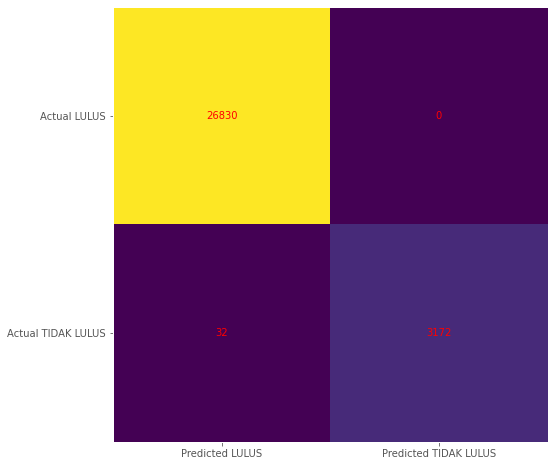

In [23]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted LULUS', 'Predicted TIDAK LULUS'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual LULUS', 'Actual TIDAK LULUS'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# K-Nearest Neighbour

In [24]:
# Prediksi lulus atau tidak lulus berdasarkan data nilai pre dan post test
# data_x = pre dan post test
# data_y = status

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [129]:
(df_data[['PRE TEST']+['POST TEST']].shape, df_data[['STATUS']].shape)

((150166, 2), (150166, 1))

In [135]:
# Split data
# knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data['POST TEST'], df_data['STATUS'], test_size=0.2, random_state=0)
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [136]:
(knn_x_train.shape, knn_x_test.shape, knn_y_train.shape, knn_y_test.shape)

((120132, 2), (30034, 2), (120132,), (30034,))

In [141]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(knn_x_train, knn_y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(knn_x_test)

In [142]:
# Akurasi Model
metrics.accuracy_score(y_pred_knn, knn_y_test)

0.9989345408536991

Text(0, 0.5, 'Error mean')

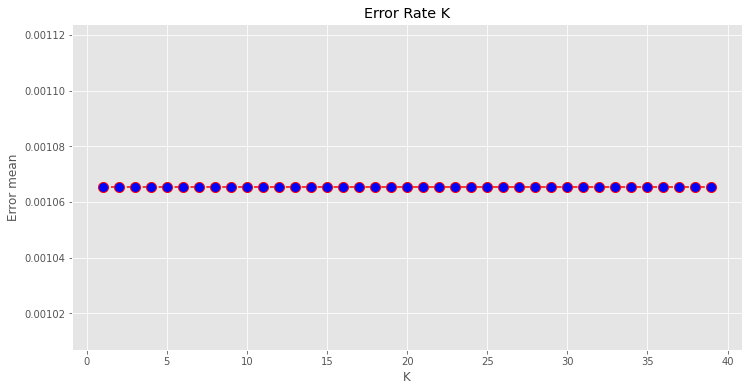

In [125]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn.fit(knn_x_train, knn_y_train)
    pred_i = knn.predict(knn_x_test)
    error.append(np.mean(pred_i != knn_y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

Error rate untuk K 1-40 masih sama di 0.001

# Support Vector Machine

In [146]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score



In [147]:
(df_data[['PRE TEST']+['POST TEST']].shape, df_data[['STATUS']].shape)

((150166, 2), (150166, 1))

In [148]:
# Split data
# knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data['POST TEST'], df_data['STATUS'], test_size=0.2, random_state=0)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [149]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_svm, y_train_svm) 

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test_svm)

In [150]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Accuracy: 0.9971032829459945


# Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [152]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [157]:
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(x_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred = dct.predict(x_test_dt)

In [158]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9990011320503429


# Random Forest

In [156]:
x_train_rft, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [163]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train_rft, y_train_rf) 

y_pred_rfc=rfc.predict(x_test_rf)

In [164]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Random Forest:",metrics.accuracy_score(y_test_rf, y_pred_rfc))

Accuracy Random Forest: 0.9990677232469868


# Naive Bayes

In [161]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [162]:
from sklearn.naive_bayes import GaussianNB 
nbc=GaussianNB()
nbc.fit(x_train_nbc, y_train_nbc)
y_pred_nbc = nbc.predict(x_test_nbc)

In [165]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test_nbc, y_pred_nbc))

Accuracy Naive Bayes: 0.9913098488379836


# Confusion Matrix

In [ ]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['PRE TEST']+['POST TEST']], df_data['STATUS'], test_size=0.2, random_state=0)

In [166]:
from sklearn.metrics import confusion_matrix

In [168]:
cm = confusion_matrix(y_test_nbc, y_pred_nbc)
cm

array([[26755,    75],
       [  186,  3018]], dtype=int64)

# Visualization

Menganalisa Data menggunakan setidaknya 2 tipe grafik/plot

### Visualisasi Confusion Matrix Algoritma Naive Bayes

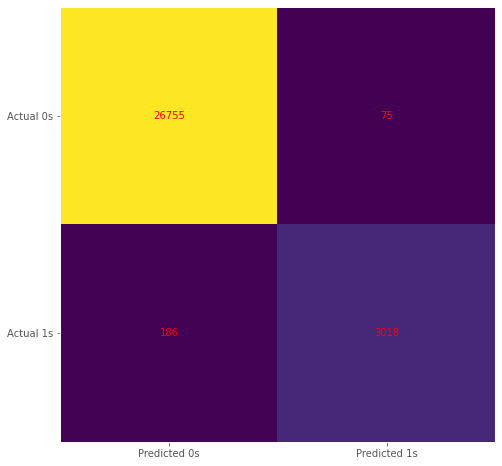

In [170]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Visualisasi Feature Importance dari algoritma Random Forest

In [28]:
print(model.intercept_, model.coef_)

[-15.38483977] [[  0.09168644 -13.7352521 ]]


In [29]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [126]:
error

[0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859,
 0.001065459146300859]

In [30]:
x.shape

(10, 1)

In [31]:
y.shape

(10,)

In [32]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [33]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
model.classes_

array([0, 1])

In [35]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [36]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [37]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [38]:
model.score(x,y)

0.9

In [39]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

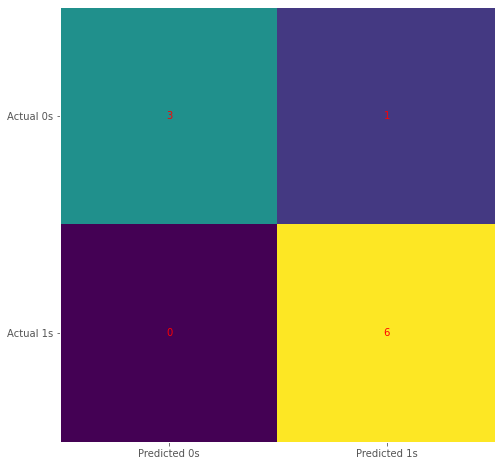

In [40]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [41]:
x, y = load_digits(return_X_y=True)
x[1].shape

(64,)

In [42]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])